<!--start-block-->
<hr style="height: 1px;">
<i>This code was authored by the 8.S50x Course Team, Copyright 2021 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

# RECITATION 3: Likelihoods and Fitting

<span style="color:red">Jack wrote this notebook into recitation 3 before he learned that it's really more like recitation 4 material. So it was moved to recitation 4. It reviews the principles of frequentist fitting and goes through an example of how to fit using a non-Gaussian likelihood. A fair amount of the students' work at the end is devoted to making nice plots as well.
</span>

<br>
<!--end-block--> 

<!--start-block-->
<hr style="height: 1px;">

## 3.1 Principles of Frequentist Fitting

Suppose you have some data $D$ you've collected, and a model for the data. Your model is really a function $f$ which maps from some model parameters $\theta$ to the data $D$. The purpose of the fit is to determine the true value of $\theta$ from the data.

In this language, $D$ and $\theta$ can be vectors or scalars depending on how many data points or parameters there are. To make things more complicated, the data points $D$ usually have an uncertainty on them called a <b>systematic uncertainty</b>. You can represent this by thinking of the data as a set of random variables.

(<i>Technical note:</i> In practice, thinking of the data as random variables means that the parameter $\theta$ is also a random variable. It therefore doesn't make sense to ask for the true <i>value</i> of $\theta$; instead we should ask for the true <i>distribution</i>. However, most people gloss over this fact by representing the "value" of $\theta$ as its distribution's mean.)


<!--end-block-->

<!--start-block-->

As you can imagine, the problem of finding the true $\theta$ is hard. That's why there are multiple fitting methods. The most popular are **Bayesian** and **frequentist** fitting, and we study frequentist here.

To fit a model function $f$ to data $D$ using the frequentist method, perform the following two steps.

1. Use your knowledge of the model to derive a <b>likelihood</b> function for your data. Likelihood is defined as the probability of the data $D$ occuring given some guess at parameters $\theta$. In the language of probability,
$$\mathcal{L}(\theta) = P(D | \theta)$$

2. Find the value $\theta_0$ which maximizes the likelihood. Take this value as your fit result.

That's it! In practice, you might also be interested in getting uncertainties on your fit result, so we'll discuss that in the next section.
<!--end-block-->

<!--start-block-->
#### <span style="color:purple">>>>QUESTION</span>


The frequentist method is so simple! Why do other methods exist? I.e., what are potential problems with the logic behind the method?

Hint: Why should the $\theta$ that maximizes likelihood be the true $\theta$? Should the goal be to maximize $P(D|\theta)$ or $P(\theta|D)$?

<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 3.3 Likelihood

To investigate the first step of the minimization process, let's look at a different example.

Suppose you're an astrophysicist looking at a distant star. Photons hit your telescope at random, independent intervals, so the the number that you detect within your period of observation is Poisson distributed.

Also, this star is really important, and $N\gg 1$ telescopes are looking at it. Your data $D$ is therefore is $\{n_1, n_2, \dots, n_N\}$ which is the counts observed by the telescopes during one day.

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

Let's generate some Poisson-distributed sample data for each telescope. We'll assume a parameter of $\lambda=5$ counts per day, with $N=100$ telescopes.

<!--
#initial code
import numpy as np

LAMBDA = 5
N = 100

counts = np.random.poisson(LAMBDA, N);
-->

<!--end-block-->

In [3]:
import numpy as np

LAMBDA = 5
N = 100

counts = np.random.poisson(LAMBDA, N);

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

Since each telescope's detection $n_i$ is independent, the probability of detecting data set $D$ given some estimate of $\lambda$, which is the parameter, is simply the product of the probability for each telescope to detect $n_i$. This probability is Poisson distributed.

We would like to use `LMFIT`'s minimize function, which does not actually request the likelihood as an input. Instead, it asks for the logarithm of the likelihood of each data point, and assumes that each data point is independent. Internally, it adds all the likelihoods from all data points to get the log-likelihood of the data.

<!--
#initial code
import numpy as np
from scipy.stats import poisson

def log_likelihood(l, data):
    return np.log(poisson.pmf(data, l))
-->

In [5]:
import numpy as np
from scipy.stats import poisson

def log_likelihood(l, data):
    return np.log(poisson.pmf(data, l))

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

Use `LMFIT`'s minimize function to maximize the likelihood (i.e. minimize the negative likelihood) and recover our $\lambda=5$ value.

<!--
#initial code
from lmfit import minimize, fit_report

def negative_log_likelihood(l, data):
    return -log_likelihood(l, data)

params = Parameters()
params.add('l', min=0, value=1)

result = minimize(negative_log_likelihood, params, args=(counts,))
print(fit_report(result))
-->

<!--end-block-->

In [6]:
from lmfit import Parameters, minimize, fit_report

def negative_log_likelihood(l, data):
    return -log_likelihood(l, data)

params = Parameters()
params.add('l', min=0, value=1)

result = minimize(negative_log_likelihood, params, args=(counts,))
print(fit_report(result))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 100
    # variables        = 1
    chi-square         = 490.896895
    reduced chi-square = 4.95855449
    Akaike info crit   = 161.106393
    Bayesian info crit = 163.711563
[[Variables]]
    l:  5.39202565 +/- 0.56166769 (10.42%) (init = 1)


<!--start-block-->
#### <span style="color:purple">>>>QUESTION</span>


Why is it okay to use the log likelihood instead of the likelihood for our likelihood function?

Hint: what is the one and only purpose of the likelihood function we have mentioned so far? How is it affected by taking the log?

<br>
<!--end-block-->

<!--start-block-->
#### <span style="color:#BA2220">>>>EXERCISE</span>

Show the following in the same plot
* A histogram of the $n_i$ values observed by all the telescopes (choose your bins wisely)
* Superimposed, the best fit Poisson distribution with the $\lambda$ you got above (access the $\lambda$ with `result.params['l'].value` instead of copying it over)
* The true distribution ($\lambda$=5)
* Axis labels
* A legend

<!--
#initial code
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

#your code here
-->

<!--
#solution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

bins = np.arange(np.max(counts)+1)-0.5
xs = bins+0.5
plt.hist(counts, bins=bins, label="Photon data", fill=False, histtype="step", color='k', linewidth=2)
plt.plot(xs, N * poisson.pmf(xs, result.params['l'].value), label="Best fit distro", color="C0", linewidth=2)
plt.plot(xs, N * poisson.pmf(xs,LAMBDA), label="True distro", color="C1", linewidth=2)

plt.xlabel("Number of photons observed")
plt.ylabel("Number of telescopes")
plt.legend()
-->

<!--end-block-->

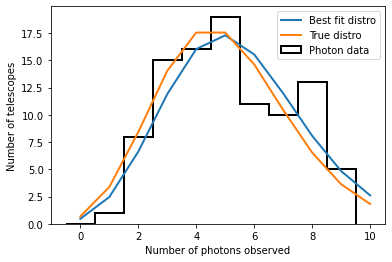

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

bins = np.arange(np.max(counts)+1)-0.5
xs = bins+0.5
plt.hist(counts, bins=bins, label="Photon data", fill=False, histtype="step", color='k', linewidth=2)
plt.plot(xs, N * poisson.pmf(xs, result.params['l'].value), label="Best fit distro", color="C0", linewidth=2)
plt.plot(xs, N * poisson.pmf(xs,LAMBDA), label="True distro", color="C1", linewidth=2)

plt.xlabel("Number of photons observed")
plt.ylabel("Number of telescopes")
plt.legend()

<!--start-block-->
#### <span style="color:#BA2220">>>>EXERCISE</span>

To take into effect the uncertainty on $\lambda$, compute the Poisson distribution not just for the best fit value of $\lambda$, but also for $\lambda - 2\sigma_\lambda$, $\lambda+2\sigma_\lambda$, and ten $\lambda$s in between. Store those results in a list. Here, $\sigma_\lambda$ is the uncertainty on $\lambda$ generated by the fit and you can get it with `result.params['l'].stderr`.

Copy and paste your code from above and add an error band (`plt.fill_between`) where the lower edge of the error band in each bin represents the lowest number of telescopes predicted among all the distributions you computed above, and the higher edge represents the highest number of telescopes.

Please ask for help if you're confused about how to do this or about what you're being asked to do.

<!--
#initial code
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

#your code here
-->

<!--
#solution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

bins = np.arange(np.max(counts)+1)-0.5
xs = bins+0.5
plt.hist(counts, bins=bins, label="Photon data", fill=False, histtype="step", color='k', linewidth=2)
plt.plot(xs, N * poisson.pmf(xs, result.params['l'].value), label="Best fit distro", color="C0", linewidth=2)
plt.plot(xs, N * poisson.pmf(xs,LAMBDA), label="True distro", color="C1", linewidth=2)

factor = np.linspace(-2, 2, 10)
distros = np.array([N * poisson.pmf(xs, result.params['l'].value + f * result.params['l'].stderr) for f in factor])
minimum = [np.min(distros[:,i]) for i in range(distros.shape[1])]
maximum = [np.max(distros[:,i]) for i in range(distros.shape[1])]
plt.fill_between(xs, minimum, maximum, alpha=0.5, color="C0")
plt.xlabel("Number of photons observed")
plt.ylabel("Number of telescopes")
plt.legend()
-->

<!--end-block-->

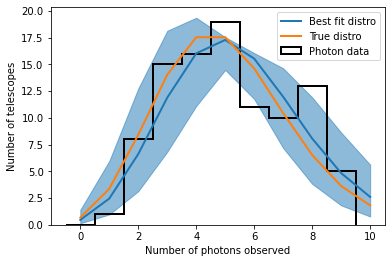

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

bins = np.arange(np.max(counts)+1)-0.5
xs = bins+0.5
plt.hist(counts, bins=bins, label="Photon data", fill=False, histtype="step", color='k', linewidth=2)
plt.plot(xs, N * poisson.pmf(xs, result.params['l'].value), label="Best fit distro", color="C0", linewidth=2)
plt.plot(xs, N * poisson.pmf(xs,LAMBDA), label="True distro", color="C1", linewidth=2)

factor = np.linspace(-2, 2, 10)
distros = np.array([N * poisson.pmf(xs, result.params['l'].value + f * result.params['l'].stderr) for f in factor])
minimum = [np.min(distros[:,i]) for i in range(distros.shape[1])]
maximum = [np.max(distros[:,i]) for i in range(distros.shape[1])]
plt.fill_between(xs, minimum, maximum, alpha=0.5, color="C0")
plt.xlabel("Number of photons observed")
plt.ylabel("Number of telescopes")
plt.legend()